In [151]:
 %matplotlib inline

In [152]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [153]:
# Store file paths in a variable
occupation_data_file = Path("Resources/national_M2022_dl.xlsx")
employment_data_file = Path("Resources/occupation.xlsx")
automation_file = Path("Resources/automation_data_by_state.csv")
occupation_gender_file = Path("Resources/cpsaat11.xlsx")

In [154]:
# Read the files into dataframes
occupation_group_data = pd.read_excel(occupation_data_file)
employment_data_df = pd.read_excel(employment_data_file, sheet_name ="Table 1.7",header=1)
factors_utilization= pd.read_excel(employment_data_file, sheet_name ="Table 1.12",header=1)
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")
occupation_gender_df = pd.read_excel(occupation_gender_file,header=None)

In [155]:
# Sample data of occupation_group_data dataframe
occupation_group_data.sample(5)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1128,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,49-9063,Musical Instrument Repairers and Tuners,...,18.34,23.67,30.34,27250,30680,38150,49230,63110,NaN,NaN
111,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,13-2020,Property Appraisers and Assessors,...,29.6,39.88,56.54,35700,46530,61560,82950,117600,NaN,NaN
1070,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,49-1000,"Supervisors of Installation, Maintenance, and ...",...,35.16,44.5,53.86,44900,56760,73140,92560,112020,NaN,NaN
792,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,41-1010,First-Line Supervisors of Sales Workers,...,22.98,31.18,46.38,30060,37010,47800,64860,96470,NaN,NaN
1118,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,49-9041,Industrial Machinery Mechanics,...,28.76,34.5,39.81,38900,48180,59830,71760,82810,NaN,NaN


In [156]:
# Columns
occupation_group_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [157]:
# Select the requred columns-'OCC_CODE', 'OCC_TITLE', 'O_GROUP'
occupation_group_data = occupation_group_data[['OCC_CODE', 'OCC_TITLE', 'O_GROUP']]

In [158]:
# Rename the columns
occupation_group_data.rename(columns={'OCC_CODE':"2022 National Employment Matrix code",'OCC_TITLE' : "2022 National Employment Matrix title",'O_GROUP':"Occupation Group" },inplace=True)
occupation_group_data.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group
0,00-0000,All Occupations,total
1,11-0000,Management Occupations,major
2,11-1000,Top Executives,minor
3,11-1010,Chief Executives,broad
4,11-1011,Chief Executives,detailed


In [159]:
# Count of each column items
occupation_group_data.count()

2022 National Employment Matrix code     1402
2022 National Employment Matrix title    1402
Occupation Group                         1402
dtype: int64

In [160]:
# Check for duplicate records
occupation_group_data.duplicated().sample(10)

464     False
559     False
102     False
1213    False
688     False
116     False
149     False
695     False
891     False
83      False
dtype: bool

In [161]:
# Reset the index of employment_data_df dataframe
employment_data_df.reset_index()

employment_data_df.head()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—
1,Management occupations,11-0000,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—
2,Top executives,11-1000,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—
3,Chief executives,11-1011,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN
4,General and operations managers,11-1021,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN


In [162]:
# Display the columns
employment_data_df.columns

Index(['2022 National Employment Matrix title',
       '2022 National Employment Matrix code', 'Occupation type',
       'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation'],
      dtype='object')

In [163]:
# Count of each column items
employment_data_df.count()

2022 National Employment Matrix title                                        1117
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1104
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [164]:
# Remove the footer in the last 4 lines
employment_data_df = employment_data_df.drop(employment_data_df.index[-4:], axis=0)
employment_data_df.tail()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
1108,"Pump operators, except wellhead pumpers",53-7072,Line item,11.2,11.6,0.4,3.6,—,1.2,55860,High school diploma or equivalent,NaN,Moderate-term on-the-job training
1109,Wellhead pumpers,53-7073,Line item,16.2,15.9,-0.4,-2.2,0.4,1.6,63280,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
1110,Refuse and recyclable material collectors,53-7081,Line item,146.4,151.1,4.7,3.2,7.6,18.6,43540,No formal educational credential,NaN,Short-term on-the-job training
1111,"Tank car, truck, and ship loaders",53-7121,Line item,13.3,13.5,0.2,1.6,3.3,1.6,53930,No formal educational credential,NaN,Short-term on-the-job training
1112,"Material moving workers, all other",53-7199,Line item,26.1,27.0,0.9,3.5,3.1,3.2,38800,No formal educational credential,NaN,Short-term on-the-job training


In [165]:
# Count of each column items
employment_data_df.count()

2022 National Employment Matrix title                                        1113
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1104
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [166]:
factors_utilization =  factors_utilization[['2022 National Employment Matrix occupation code','Factors affecting occupational utilization']]

In [167]:
factors_utilization


,2022 National Employment Matrix occupation code,Factors affecting occupational utilization
0,11-1011,Productivity change - share decreases as chang...
1,11-2011,Productivity change - share decreases as conso...
2,11-2021,Productivity change - share decreases as conso...
3,11-2021,Demand change - share increases as an expected...
4,11-2022,Demand change - share decreases as growth in o...
...,...,...
1061,53-7081,"Productivity change, capital/labor substitutio..."
1062,53-7081,"Productivity change, capital/labor substitutio..."
1063,53-7081,"Productivity change, capital/labor substitutio..."
1064,53-7199,Productivity change - share decreases as conti...


In [168]:
factors_utilization.rename(columns={'2022 National Employment Matrix occupation code':'2022 National Employment Matrix code'},inplace = True)

In [169]:
factors_utilization = factors_utilization.drop_duplicates(subset='2022 National Employment Matrix code', keep='first')

In [170]:
factors_utilization = pd.merge(employment_data_df,factors_utilization,on ='2022 National Employment Matrix code',how="left")

In [171]:
employment_details.count()

2022 National Employment Matrix title                                        1113
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1104
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [172]:
# merge the occupation_group_data and employment_data_df dataframes
employment_wage_education = pd.merge(occupation_group_data,employment_details ,on= ["2022 National Employment Matrix code","2022 National Employment Matrix code"])
employment_wage_education.head(50)

,2022 National Employment Matrix code,2022 National Employment Matrix title_x,Occupation Group,2022 National Employment Matrix title_y,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Factors affecting occupational utilization
0,00-0000,All Occupations,total,"Total, all occupations",Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—,NaN
1,11-0000,Management Occupations,major,Management occupations,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—,NaN
2,11-1000,Top Executives,minor,Top executives,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—,NaN
3,11-1011,Chief Executives,detailed,Chief executives,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN,Productivity change - share decreases as chang...
4,11-1021,General and Operations Managers,detailed,General and operations managers,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN,NaN
5,11-1031,Legislators,detailed,Legislators,Line item,44.4,46.0,1.5,3.4,—,3.4,48090,Bachelor's degree,Less than 5 years,NaN,NaN
6,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,"Advertising, marketing, promotions, public...",Summary,1049.4,1102.2,52.8,5.0,3.5,85.0,132820,—,—,—,NaN
7,11-2011,Advertising and Promotions Managers,detailed,Advertising and promotions managers,Line item,30.9,31.4,0.6,1.9,27,2.8,127830,Bachelor's degree,Less than 5 years,NaN,Productivity change - share decreases as conso...
8,11-2020,Marketing and Sales Managers,broad,Marketing and sales managers,Summary,912.9,959.1,46.2,5.1,2.9,74.4,133880,—,—,—,NaN
9,11-2021,Marketing Managers,detailed,Marketing managers,Line item,358.2,381.9,23.7,6.6,5.3,31.2,140040,Bachelor's degree,5 years or more,NaN,Productivity change - share decreases as conso...


In [173]:
employment_wage_education.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title_x                                      1117
Occupation Group                                                             1117
2022 National Employment Matrix title_y                                      1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical educatio

In [174]:
# Drop the 2022 National Employment Matrix title_y column
employment_wage_education = employment_wage_education.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
employment_wage_education.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [175]:
# Count of each column items
employment_wage_education.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title                                        1117
Occupation Group                                                             1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical education needed for entry                                           1117
Work experience 

In [176]:
# Display some sample data of automation_data dataframe
automation_data.sample(50)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
582,51-4062,Patternmakers; Metal and Plastic,0.9000,120,0,0,0,280,0,0,...,0,30,210,0,0,0,40,0,260,0
4,11-2022,Sales Managers,0.0130,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
81,17-2021,Agricultural Engineers,0.4900,0,0,0,40,370,30,0,...,0,0,100,60,0,0,0,0,0,0
244,29-1123,Physical Therapists,0.0210,2460,460,3150,1940,19910,4740,3800,...,730,4330,14910,1720,740,5790,4550,1190,4440,420
53,13-2052,Personal Financial Advisors,0.5800,2060,130,3890,910,24580,3950,4300,...,350,2330,12660,1920,350,4560,3890,460,4370,200
370,41-3021,Insurance Sales Agents,0.9200,5680,610,8590,2950,38280,10250,6450,...,1870,7780,32330,3420,860,10180,8300,1830,8180,610
444,45-4023,Log Graders and Scalers,0.9700,120,0,0,210,0,0,0,...,0,110,30,0,0,130,250,180,50,0
154,21-1013,Marriage and Family Therapists,0.0140,190,40,1740,70,10350,570,370,...,90,680,1250,260,0,1000,350,520,1000,40
489,47-4799,Construction and Related Workers; All Other,0.7100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,27-2042,Musicians and Singers,0.0740,120,0,0,0,7280,530,520,...,0,1680,1600,340,0,800,1070,140,560,0


In [177]:
# Count of each column items
automation_data.count()

SOC                     702
Occupation              702
Probability             702
Alabama                 702
Alaska                  702
Arizona                 702
Arkansas                702
California              702
Colorado                702
Connecticut             702
Delaware                702
District of Columbia    702
Florida                 702
Georgia                 702
Hawaii                  702
Idaho                   702
Illinois                702
Indiana                 702
Iowa                    702
Kansas                  702
Kentucky                702
Louisiana               702
Maine                   702
Maryland                702
Massachusetts           702
Michigan                702
Minnesota               702
Mississippi             702
Missouri                702
Montana                 702
Nebraska                702
Nevada                  702
New Hampshire           702
New Jersey              702
New Mexico              702
New York            

In [178]:
# Rename the columns "SOC" to "2022 National Employment Matrix code" and "Probability" to "Automation Probability"
automation_data.rename(columns={"SOC":"2022 National Employment Matrix code","Probability":"Automation Probability"},inplace =True) 

In [179]:
automation_data = automation_data[["2022 National Employment Matrix code","Automation Probability"]]

In [180]:
# Merge the employment_wage_education and automation_data dataframes
occupation_automation_df = pd.merge(employment_wage_education,automation_data,how="left",on=["2022 National Employment Matrix code","2022 National Employment Matrix code"])
occupation_automation_df.head(20)

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Factors affecting occupational utilization,Automation Probability
0,00-0000,All Occupations,total,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—,NaN,NaN
1,11-0000,Management Occupations,major,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—,NaN,NaN
2,11-1000,Top Executives,minor,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—,NaN,NaN
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN,Productivity change - share decreases as chang...,0.015
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN,NaN,0.160
5,11-1031,Legislators,detailed,Line item,44.4,46.0,1.5,3.4,—,3.4,48090,Bachelor's degree,Less than 5 years,NaN,NaN,NaN
6,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,Summary,1049.4,1102.2,52.8,5.0,3.5,85.0,132820,—,—,—,NaN,NaN
7,11-2011,Advertising and Promotions Managers,detailed,Line item,30.9,31.4,0.6,1.9,27,2.8,127830,Bachelor's degree,Less than 5 years,NaN,Productivity change - share decreases as conso...,0.039
8,11-2020,Marketing and Sales Managers,broad,Summary,912.9,959.1,46.2,5.1,2.9,74.4,133880,—,—,—,NaN,NaN
9,11-2021,Marketing Managers,detailed,Line item,358.2,381.9,23.7,6.6,5.3,31.2,140040,Bachelor's degree,5 years or more,NaN,Productivity change - share decreases as conso...,0.014


In [181]:
# Display the count of column items
occupation_automation_df.columns
occupation_automation_df.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title                                        1117
Occupation Group                                                             1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical education needed for entry                                           1117
Work experience 

In [182]:
# sample data of occupation_gender_df dataframe
occupation_gender_df.reset_index()

occupation_gender_df.head(50)

,0,1,2,3,4,5,6,7
0,NaN,HOUSEHOLD DATA\nANNUAL AVERAGES\n11. Employed ...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[Numbers in thousands],NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Occupation,2022,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Total\nemployed,Percent of total employed,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Women,White,Black or\nAfrican\nAmerican,Asian,Hispanic\nor Latino
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Total, 16 years and over",158291,46.8,77,12.6,6.7,18.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,"Management, professional, and related occupat...",68099,51.5,77.7,10.2,9,10.9


In [183]:
# Exculde the header rows
occupation_gender_df = occupation_gender_df.iloc[9:]

In [184]:
# Name columns
occupation_gender_df.columns = ["2022 National Employment Matrix code","2022 National Employment Matrix title","Total employed", "Women","White","Black or African American","Asian","Hispanic or Latino"]

In [185]:
# Merge occupation_automation_df,occupation_gender_df dataframes
occupation_data_complete = pd.merge(occupation_automation_df,occupation_gender_df,how = "left",on="2022 National Employment Matrix code")


In [186]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title_x', 'Occupation Group',
       'Occupation type', 'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Factors affecting occupational utilization', 'Automation Probability',
       '2022 National Employment Matrix title_y', 'Total employed', 'Women',
       'White', 'Black or African American', 'Asian', 'Hispanic or Latino'],
      dtype='object')

In [187]:
# Drop the 2022 National Employment Matrix title_y column
occupation_data_complete = occupation_data_complete.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
occupation_data_complete.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [188]:
occupation_data_complete.count()

2022 National Employment Matrix code                                         1119
2022 National Employment Matrix title                                        1119
Occupation Group                                                             1119
Occupation type                                                              1119
Employment, 2022                                                             1119
Employment, 2032                                                             1119
Employment change, numeric, 2022-32                                          1119
Employment change, percent, 2022-32                                          1119
Percent self employed, 2022                                                  1119
Occupational openings, 2022-32 annual average                                1119
Median annual wage, 2022(1)                                                  1112
Typical education needed for entry                                           1119
Work experience 

In [205]:
occupation_data_complete.head(20)
occupation_data_complete["Median annual wage, 2022(1)"]=pd.to_numeric(occupation_data_complete["Median annual wage, 2022(1)"])

In [207]:
occupation_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   2022 National Employment Matrix code                                       1119 non-null   object 
 1   2022 National Employment Matrix title                                      1119 non-null   object 
 2   Occupation Group                                                           1119 non-null   object 
 3   Occupation type                                                            1119 non-null   object 
 4   Employment, 2022                                                           1119 non-null   float64
 5   Employment, 2032                                                           1119 non-null   float64
 6   Employment change, numeric, 2022-32                     

In [190]:
# Create a dataframe for all the major sectors
Employment_distribution_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major" ]
Employment_distribution_df.count()

2022 National Employment Matrix code                                         22
2022 National Employment Matrix title                                        22
Occupation Group                                                             22
Occupation type                                                              22
Employment, 2022                                                             22
Employment, 2032                                                             22
Employment change, numeric, 2022-32                                          22
Employment change, percent, 2022-32                                          22
Percent self employed, 2022                                                  22
Occupational openings, 2022-32 annual average                                22
Median annual wage, 2022(1)                                                  22
Typical education needed for entry                                           22
Work experience in a related occupation 

In [191]:
Employment_distribution_df =Employment_distribution_df[["2022 National Employment Matrix title",'Employment, 2022','Employment, 2032']]

Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")
Employment_distribution_df = Employment_distribution_df.set_index("2022 National Employment Matrix title")
Employment_distribution_df

,"Employment, 2022","Employment, 2032"
2022 National Employment Matrix title,,
Management,12574.7,13257.7
Business and Financial Operations,10591.1,11179.7
Computer and Mathematical,5277.6,6081.4
Architecture and Engineering,2611.8,2746.8
"Life, Physical, and Social Science",1473.7,1563.2
Community and Social Service,2936.5,3164.2
Legal,1362.4,1442.3
Educational Instruction and Library,9354.1,9570.6
"Arts, Design, Entertainment, Sports, and Media",3071.1,3187.0


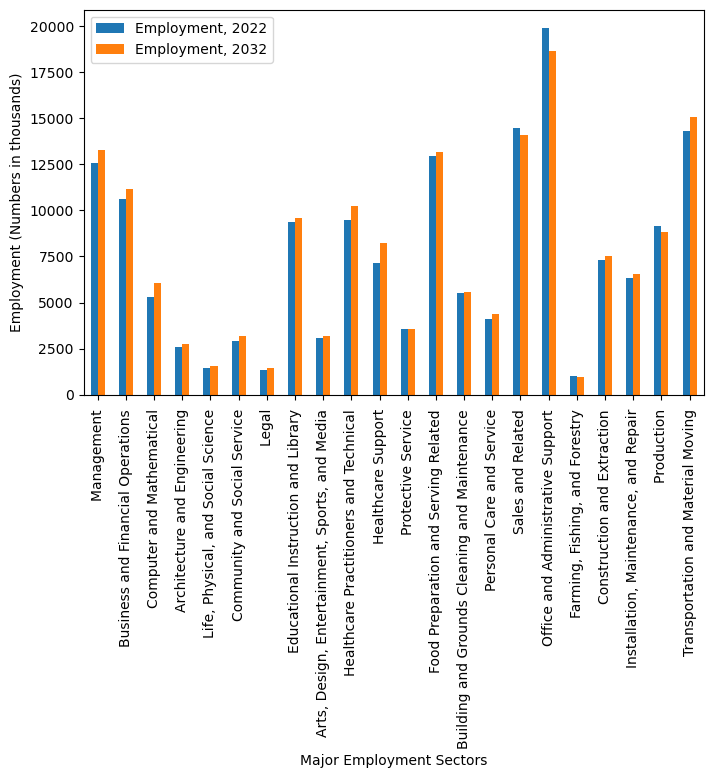

In [192]:
Employment_distribution_df.plot(kind="bar",xlabel='Major Employment Sectors',ylabel = "Employment (Numbers in thousands)",figsize=(8,5))
plt.savefig("emp_dist_plot")

In [193]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title', 'Occupation Group',
       'Occupation type', 'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Factors affecting occupational utilization', 'Automation Probability',
       'Total employed', 'Women', 'White', 'Black or African American',
       'Asian', 'Hispanic or Latino'],
      dtype='object')

In [194]:
# Occupations that are highly impacted by automation
occupation_detailed = occupation_data_complete[occupation_data_complete['Occupation Group']=="detailed"]
occupation_detailed.columns
occupation_automation = occupation_detailed[['2022 National Employment Matrix title',"Automation Probability"] ]

occupation_automation.dropna()
occupation_automation_sorted = occupation_automation.sort_values("Automation Probability",ascending=False)
occupation_automation_sorted.head(50)


,2022 National Employment Matrix title,Automation Probability
979,"Sewers, Hand",0.99
1037,Photographic Process Workers and Processing Ma...,0.99
83,Insurance Underwriters,0.99
897,Watch and Clock Repairers,0.99
349,Library Technicians,0.99
269,"Title Examiners, Abstractors, and Searchers",0.99
709,New Accounts Clerks,0.99
677,Telemarketers,0.99
91,Tax Preparers,0.99
716,Cargo and Freight Agents,0.99


In [195]:
# Fastest growing occupations- employment change percenatge > 18%
fastest_growing_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] > 18.0]
fastest_growing_occ = fastest_growing_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
fastest_growing_occ.sort_values('Employment change, percent, 2022-32', ascending=False).head(10)

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
900,Wind Turbine Service Technicians,44.9
440,Nurse Practitioners,44.5
119,Data Scientists,35.2
118,Statisticians,31.6
97,Information Security Analysts,31.5
40,Medical and Health Services Managers,28.4
183,Epidemiologists,26.7
425,Physician Assistants,26.5
512,Physical Therapist Assistants,26.1
109,Software Developers,25.7


In [196]:
# Fastest declining occupations- employment change percenatge < 0%
fastest_declining_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] < 0.0]
fastest_declining_occ = fastest_declining_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
fastest_declining_occ.sort_values('Employment change, percent, 2022-32', ascending=True).head(15)

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
737,Word Processors and Typists,-38.6
897,Watch and Clock Repairers,-29.8
836,"Roof Bolters, Mining",-28.5
1022,"Cutters and Trimmers, Hand",-28.2
686,Telephone Operators,-26.6
736,Data Entry Keyers,-26.0
685,"Switchboard Operators, Including Answering Ser...",-25.1
954,Foundry Mold and Coremakers,-23.5
973,"Pressers, Textile, Garment, and Related Materials",-21.8
731,Legal Secretaries and Administrative Assistants,-21.8


In [197]:
major_sectors_df = occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "detailed"]
education_wages_df = major_sectors_df[["Typical education needed for entry",'Median annual wage, 2022(1)']]
education_wages_df = education_wages_df.dropna()

education_wages_df['Median annual wage, 2022(1)'] = education_wages_df['Median annual wage, 2022(1)']
# education_wages_df['Median annual wage, 2022(1)'] = education_wages_df['Median annual wage, 2022(1)'].str.replace(">=$","")
education_wages_df.sample(100)
# education_wages_df['Median annual wage, 2022(1)']
# education_wages_df = major_sectors_df[["Typical education needed for entry",'Median annual wage, 2022(1)']]

# education_wages_df['Median annual wage, 2022(1)'] = pd.to_numeric(education_wages_df['Median annual wage, 2022(1)'])
# education_wages = education_wages_df.groupby("Typical education needed for entry")['Median annual wage, 2022(1)']
# education_wages


,Typical education needed for entry,"Median annual wage, 2022(1)"
522,High school diploma or equivalent,34740
397,Bachelor's degree,79960
537,Postsecondary nondegree award,69450
689,High school diploma or equivalent,39470
874,High school diploma or equivalent,40030
...,...,...
181,Bachelor's degree,64220
613,No formal educational credential,33360
544,Bachelor's degree,59500
1117,No formal educational credential,53930


In [198]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title', 'Occupation Group',
       'Occupation type', 'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Factors affecting occupational utilization', 'Automation Probability',
       'Total employed', 'Women', 'White', 'Black or African American',
       'Asian', 'Hispanic or Latino'],
      dtype='object')

<Axes: xlabel='2022 National Employment Matrix title'>

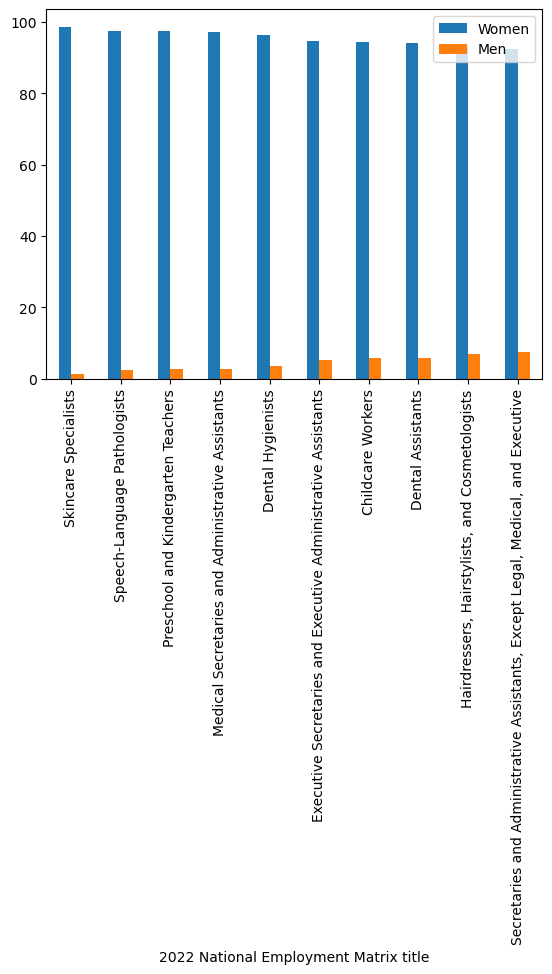

In [203]:
women_ratio = occupation_data_complete[["2022 National Employment Matrix title","Women"]] 
women_ratio = women_ratio.drop(women_ratio[women_ratio["Women"] == '–'].index)
women_ratio.dropna(axis=0)

women_ratio.fillna(0)
women_ratio["Women"] = women_ratio["Women"].astype(float)
women_ratio["Women"] 
women_ratio.dropna(axis=0)
women_ratio["Men"] = 100.0 - women_ratio["Women"] 
women_ratio.dropna(axis=0)
top_10 = women_ratio.sort_values("Women",ascending = False).head(10)
top_10.set_index("2022 National Employment Matrix title", inplace = True)
top_10.plot(kind = "bar")
# gender_ratio = women_ratio.loc[women_ratio["2022 National Employment Matrix title"] == "Management Occupations"]
# x1=gender_ratio["Women"]

# x2= gender_ratio["Men"]

# explode=(0.1,0)
# labels = ['Women','Men']
# plt.pie(values, explode=explode, labels=labels, 
#         autopct="%1.1f%%", shadow=True, startangle=140)
# plt.show()
# gender_ratio


In [200]:
women_ratio.dropna()

,2022 National Employment Matrix title,Women,Men
1,Management Occupations,40.5,59.5
3,Chief Executives,29.2,70.8
4,General and Operations Managers,35.4,64.6
7,Advertising and Promotions Managers,49.7,50.3
9,Marketing Managers,58.9,41.1
...,...,...,...
1108,"Laborers and Freight, Stock, and Material Move...",22.4,77.6
1110,"Packers and Packagers, Hand",52.9,47.1
1111,Stockers and Order Fillers,37.5,62.5
1116,Refuse and Recyclable Material Collectors,10.6,89.4
